# Coding exercises

## Iteration

Compute $\sqrt{2}$ using the recurrence relation

$$a_{n+1} = \frac{1}{2}(a_{n} + 2/a_{n})$$

where $a_{0}=1$. Now use the `decimal` module to compute $\sqrt{2}$ to 100 decimal places ([Python documentation]). How many iterations are needed?

Recall the proof of convergence of this sequence to the limit $\sqrt{2}$ from your first year mathematical analysis course, first by showing the sequence is decreasing when $a_{n}>\sqrt{2}$ and applying the [AM-GM inequality] to show that the sequence is bounded below by $\sqrt{2}$ and (thus) decreasing for all but possibly the first iteration to prove convergence, and secondly by applying the algebra of limits to reason that the limit is necessarily the positive square root of two.

In fact, this is an application of the [Babylonian method] for finding square roots (also known as Heron's method, after the first-century Greek mathematician Hero of Alexandria who gave the first explicit description of the method in his AD 60 work _Metrica_), which itself can be seen as a special case of the [Newton-Raphson method] applied to the function $f(x)=x^{2}-2$. Newton's method was developed 16 centuries after Heron's method.

[Python documentation]: https://docs.python.org/3/library/decimal.html
[AM-GM inequality]: https://en.wikipedia.org/wiki/Inequality_of_arithmetic_and_geometric_means
[Babylonian method]: https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method
[Newton-Raphson method]: https://en.wikipedia.org/wiki/Newton%27s_method#Square_root_of_a_number

In [1]:
import decimal
decimal.getcontext().prec = 102
decimal.getcontext().traps[decimal.FloatOperation] = True

# Set up our Decimal instances
two = decimal.Decimal('2')
one_half = decimal.Decimal('0.5')
sqrt_two = two.sqrt()
value = decimal.Decimal('1')

# Compute the sequence defined by the recurrence relation until either it matches sqrt(2) to the required precision
# or
index = 0
while value != sqrt_two:
    new_value = one_half * (value + (two / value))
    if new_value == value:
        print('Sequence stabilised to 101 decimal places')
        break
    else:
        value = new_value
        index += 1
print('Number of iterations required to compute sqrt(2) to 101 decimal places:', index)
print('Calculated value (prec = 102):\n', value)
print('True value (prec = 102):\n', sqrt_two)
print('Calculated value (rounded to 100 dp):\n', round(value, 100))
print('True value (rounded to 100 dp):\n', round(sqrt_two, 100))

Number of iterations required to compute sqrt(2) to 101 decimal places: 8
Calculated value (prec = 102):
 1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157274
True value (prec = 102):
 1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157274
Calculated value (rounded to 100 dp):
 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727
True value (rounded to 100 dp):
 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


## Pisano periods

Write a function to compute the Fibonacci sequence. Now modify the function to compute the Fibonacci sequence modulo $N$, using the `%` operator to find the remainder upon division.

For example, modulo $N=4$ the sequence $0,1,1,2,3,5,8,13,21,34,55,89,\ldots$ becomes $0,1,1,2,3,1,0,1,1,2,3,1,\ldots$
Can you see a repeating sequence here?

Write a function to compute the Pisano period $\pi(N)$: the length of the repeating sequence of Fibonacci numbers modulo $N$ (e.g. $\pi(4)=6$). What is $\pi(N = 144)$?

Read more at http://en.wikipedia.org/wiki/Pisano_period

In [2]:
# Function definitions
def fib_seq(length):
    sequence = [0, 1]
    if length <= 2:
        return sequence
    else:
        for i in range(length-2):
            sequence.append(sequence[-2] + sequence[-1])
    return sequence

def fib_seq_mod(length, modulus):
    return [value % modulus for value in fib_seq(length)]

def pisano_period(modulus):
    if modulus == 1:
        return 1
    sequence = [0, 1, 1]
    counter = 2
    while (sequence[-2], sequence[-1]) != (1, 0):
        sequence.append((sequence[-2] + sequence[-1]) % modulus)
        counter += 1
    assert counter == len(sequence) - 1
    return counter, sequence

def pisano_period_results(modulus):
    results = pisano_period(modulus)
    results_string = """Fibonacci sequence:
{fib_seq}
modulo {modulus}:
{fib_seq_mod}
Pisano period pi({modulus}) = {period}
""".format(fib_seq=fib_seq(length=results[0] + 1),
           modulus=modulus,
           fib_seq_mod=results[1],
           period=results[0])
    return results_string

In [3]:
# for modulus in range(2, 6):
#     print(pisano_period_results(modulus))
print(pisano_period_results(144))

Fibonacci sequence:
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368]
modulo 144:
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 0, 89, 89, 34, 123, 13, 136, 5, 141, 2, 143, 1, 0]
Pisano period pi(144) = 24



## Newton-Raphson method

Using the `cmath` module for complex numbers (https://docs.python.org/3/library/cmath.html), and the Newton-Raphson method

$$z_{n+1} = z_{n} - \frac{f(z_{n})}{f'(z_{n})}$$

find the three complex roots of the cubic $f(z) = z^{3} - 1$. Try choosing the initial value $z_{0}$ close to $0$ in the complex plane. Which root does the method converge upon?

Recall that the roots are 
$$ 1, e^{i(2\pi/3)} = -\frac{1}{2} + \frac{\sqrt{3}}{2}i, e^{i(4\pi/3)} = -\frac{1}{2} - \frac{\sqrt{3}}{2}i $$

For initial values $z_{0}$ close to $0$ the method tends to converge to the real root $z=1$.

Read more at https://en.wikipedia.org/wiki/Newton%27s_method#Complex_functions

In [4]:
import cmath

def newton_raphson(value, max_steps=1000):
    for iter_count in range(max_steps):
        if value in {complex(1.0), complex(-0.5, cmath.sqrt(3)/2), complex(-0.5, -cmath.sqrt(3)/2)}:
            break
        else:
            value = value - (value ** 3 - 1) / (3 * value ** 2)
            
    if iter_count == max_steps - 1:
        print('Gave up after', max_steps, 'iterations.')
    else:
        print('Converged to the root with phase {}*(2*pi/3) after {} iterations.'.format(round(cmath.phase(value)/(2*cmath.pi/3)),
                                                                                         iter_count))
    return value

newton_raphson(complex(-1, 1))

Converged to the root with phase 1*(2*pi/3) after 6 iterations.


(-0.5+0.8660254037844386j)

# Fracking in Lancashire

In August 2019, hydraulic fracturing (fracking) operations were undertaken at the Preston New Road site in Lancashire. Hydraulic fracturing involves the high-pressure injection of fluid at a depth of ∼ 1.8 km, and typically generates seismic events. The majority of such seismic events are rather weak, with a Local Magnitude (ML) below 0.5 ML. 

At 08:30am on 26th August 2019, a 2.9 ML tremor was recorded by the British Geological Survey (BGS). This event was reportedly felt by some residents of Blackpool, 4 miles from the site, as a loud tremor lasting for 10–15 seconds. Fracking was subsequently suspended at the site.

Seismic events in the last 50 days are recorded by the British Geological Survey (BGS), and separated into [Induced Seismicity](http://www.earthquakes.bgs.ac.uk/induced/recent_uk_events.html) and background tectonic [Earthquakes](http://www.earthquakes.bgs.ac.uk/earthquakes/recent_uk_events.html).

We use the BGS data to produce a histogram plot of the number of induced seismic events by local magnitude.

## Import the data

In [5]:
import pandas as pd
%matplotlib inline

# Get the latest data from the website today, or read from a local file of data extracted on 2019-10-01
url = 'http://www.earthquakes.bgs.ac.uk/induced/recent_uk_events.html'
df = pd.read_html(url, header=0)[0]
# df = pd.read_csv(r"data/induced_seismic_events_50days_20191001.csv")

## Plot the results

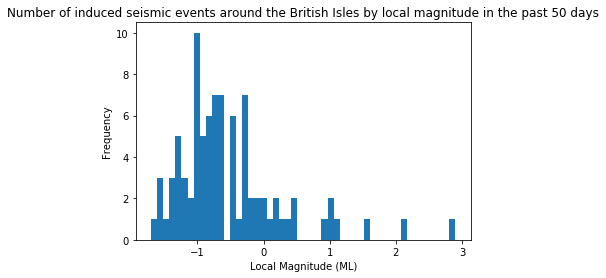

In [6]:
ax = df.Mag.plot.hist(bins=50)
ax.set(xlabel='Local Magnitude (ML)',
       title='Number of induced seismic events around the British Isles by local magnitude in the past 50 days');

# The Newton-Raphson method and fractals

The _Newton-Raphson (NR) method_ is an iterative method for finding roots of differentiable functions. 
(Recall that $\bar{x}$ is a root of a function $f$ iff $f(\bar{x}))=0$.)

Starting with an initial value $x_{0}$, the NR method generates a sequence $x_{0}, x_{1}, x_{2}, x_{3}, \ldots$
by repeated application of an iterative step:

$$x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}$$

The limit of the sequence, if it exists, is a root of $f(x)$.

In practice, we say the method converges if $|x_{i+1} − x_{i}| < \epsilon$ for some $i < i_{\max}$, where $\epsilon$ is a suitably small positive constant greater than machine precision and $i_{\max}$ is the maximum
number of iterations. (For example, $\epsilon = 10^{−12}$ and $i_{\max} = 20$.)

We will use the Newton-Raphson method to find the roots of nonlinear functions such as $Axe^{−x} − 1$ and $z^{3} − 1$.

## Newton-Raphson method

### Implementing the NR method as a Python function

Let $f_{A}(x) = Axe^{−x} − 1$ where $A$ is a real parameter ($A\in\mathbb{R}$). Then $f_{A}'(x) = A(1-x)e^{−x}$.

In [7]:
# Module imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Function definitions
def make_f_A(A):
    r"""Returns the mathematical function f_{A}(x) = A*x*exp(−x) − 1 for the input value of A."""
    return lambda x: A*x*np.exp(-x) - 1

def make_f_Aprime(A):
    r"""Returns the mathematical function f_{A}'(x) = A*(1-x)*exp(−x) for the input value of A.
    The returned function is the derivative of the function f_A defined above for the same input value of A."""
    return lambda x: A*(1-x)*np.exp(-x)

def NRmethod(f, fprime, x0, max_steps=20, tol=1e-12):
    r"""Seeks a root of a function by applying the Newton-Raphson step repeatedly to generate a sequence of estimates.

    The method should stop once either of two conditions is met:
      (i) The absolute difference between successive estimates is less than `tol` 
          (indicating that the sequence has converged sufficiently)
      (ii) The number of steps exceeds `max_steps`

    Parameters
    ----------
    f : callable function
        The function that returns f(x)
    fprime : callable function
        The function that returns f'(x)
    x0 : float
        The initial value which seeds the Newton-Raphson method
    max_steps : int, optional.  Defaults to 20
        The maximum number of iteration steps to take before returning. 
    tol : float, optional.  Defaults to 1e-12
        If two successive estimates have absolute difference less than or equal to the tolerance, we return

    Returns
    -------
    list
        The function should return a list of the sequence of estimates, [x0, x1, x2, ...]
    """
    estimates = [x0]
    while len(estimates) <= max_steps:
        # Compute a new estimate using the Newton-Raphson method
        estimates.append(
            estimates[-1] - f(estimates[-1]) / fprime(estimates[-1]))
        # Check whether the difference between the new value and previous value is less than the tolerance
        if np.abs(estimates[-1] - estimates[-2]) < tol:
            break
    return estimates

def NRmethod_results(f, fprime, x0, max_steps=20, tol=1e-12):
    xseq = NRmethod(f, fprime, x0, max_steps, tol)
    results_string = """With starting value x0 = {0:.3f} the NR method converged after {1} iterations to: 
{2:.10f}""".format(x0, len(xseq)-1, xseq[-1])
    return results_string

### Newton-Raphson method to find roots of the function $Axe^{−x} − 1$ where $A = 3$

Newton-Raphson method to find roots of the function A*x*exp(−x) − 1 where A = 3.0
With starting value x0 = 0.000 the NR method converged after 7 iterations to: 
0.6190612867
With starting value x0 = 2.000 the NR method converged after 5 iterations to: 
1.5121345517


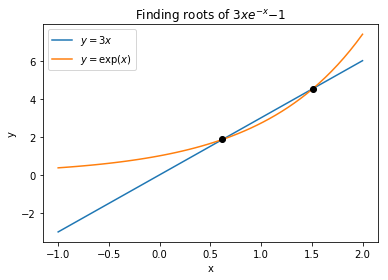

In [8]:
# Produce nicely-formatted output.
f3, f3prime = make_f_A(A=3), make_f_Aprime(A=3)
print("Newton-Raphson method to find roots of the function A*x*exp(−x) − 1 where A = 3.0")
for x0 in [0.0, 2.0]:
    print(NRmethod_results(f3, f3prime, x0))

# Plot the graphs of Ax and exp(x). Where these graphs meet give the roots for our function.
fig = plt.figure()
ax = fig.gca()

x = np.linspace(-1, 2, endpoint=True)
# ax.hlines(0, -1, 2)
ax.plot(x, 3*x, label=r"$y=3x$")
ax.plot(x, np.exp(x), label=r"$y=\exp(x)$")
# ax.plot(x, f3(x), label=r"$y=3xe^{−x} − 1$")
ax.plot([0.6190612867, 1.5121345517], [3*0.6190612867, 3*1.5121345517], 'ko')
ax.set(xlabel="x", ylabel="y", title=r"Finding roots of $3xe^{−x} − 1$")
ax.legend()
plt.show()

### A failure mode for the NR method

The Newton-Raphson method fails if $f'(x_{i})=0$ for some $i$, since we cannot compute the iteration step to find $x_{i+1}$ due to a divide-by-zero error. 

Therefore, the NR method fails to find/converge to a root of $f_{A}(x) = Axe^{−x} − 1$ for the starting value $x_{0}=1$, since $f_{A}'(1) = 0$, $\forall A\in\mathbb{R}$.

In [9]:
print(NRmethod_results(f3, f3prime, 1.0))

With starting value x0 = 1.000 the NR method converged after 20 iterations to: 
nan


C:\Users\Edward\Miniconda3\envs\idp\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Edward\Miniconda3\envs\idp\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars


### Number of real roots to $f_{A}(x) = Axe^{−x} − 1$

The number of real roots of $f_{A}(x)$ depends on the value of $A\in\mathbb{R}$. Let $e = \exp(1)$, then

- For $A < 0$ there is one real root $\bar{x} < 0$;
- For $0 \le A < e$ there are no real roots;
- For $A = e$ there is one real root at $x=1$; 
- For $A > e$ there are two real roots: $0 < \bar{x}_{1} < 1 < \bar{x}_{2}$

This can be seen by rearranging the equation $f_{A}(x) = Axe^{−x} − 1 = 0$, to obtain the equation $Ax = e^{x}$ and plotting the graphs for various values of $A$.

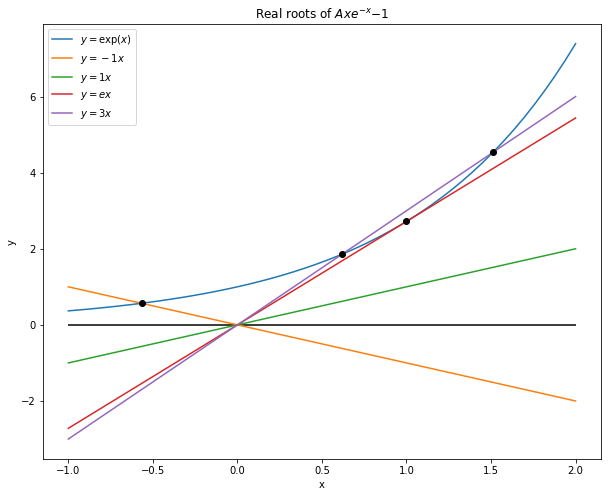

In [10]:
# Plot the graphs of Ax and exp(x). Where (if) these graphs meet give the roots for our function.
A_list = [-1.0, 1.0, np.exp(1), 3.0]
fig = plt.figure(figsize=(10, 8))
ax = fig.gca()

x = np.linspace(-1, 2, endpoint=True)
# Plot the x-axis
ax.hlines(0, -1, 2)
# Plot y = exp(x)
ax.plot(x, np.exp(x), label=r"$y=\exp(x)$")
# Plot the lines y = Ax for the values in our A_list
for A in A_list:
    ax.plot(x, A*x, label=r"$y={}x$".format(int(A) if A != np.exp(1) else 'e'))
#     ax.plot(x, make_f_A(A)(x))
# Plot some relevant intersection points
ax.plot([-0.5671432904, 0.6190612867, 1, 1.5121345517],
        [0.5671432904, 3*0.6190612867, np.exp(1), 3*1.5121345517], 'ko')
# Add axis labels and figure title
ax.set(xlabel="x", ylabel="y", title=r"Real roots of $Axe^{−x} − 1$")
# Show the legend
ax.legend()
# Display the plot
plt.show()

### The interesting case of $A=e$

In the case $A=e$ our function becomes $f_{e}(x) = xe^{1−x} − 1$, which has one real root at $x=1$, and first derivative $f_{e}'(x) = (1-x)e^{1−x}$, which also has one real root at $x=1$.

Due to the vanishing of the first derivative at the root, Newton's method [converges only linearly](https://en.wikipedia.org/wiki/Newton%27s_method#Slow_convergence_for_roots_of_multiplicity_greater_than_1) where it would otherwise usually converge [quadratically](https://en.wikipedia.org/wiki/Newton%27s_method#Non-quadratic_convergence). In general this hold for roots of multiplicity greater than one and some other cases.

The output of the code below shows that the error decreases with each iteration with a linear scaling factor approaching 0.5, which is to say that the error roughly halves after each iteration.

In [11]:
results = NRmethod(make_f_A(np.exp(1)), make_f_Aprime(np.exp(1)), 0)
error_ratios = [(1-results[i])/(1-results[i-1]) if i !=
                0 else 1 for i in range(len(results))]
print("{0:>2} | {1:^18} | {2:^18} | {3:^18} |".format(
    "n", "Estimate: x_n", "Error: 1 - x_n", "Scaling factor"))
for index, pair in enumerate(zip(results, error_ratios)):
    print("{0:2d} | {1:.16f} | {2:.16f} | {3:.16f} |".format(
        index, pair[0], 1 - pair[0], pair[1]))

 n |   Estimate: x_n    |   Error: 1 - x_n   |   Scaling factor   |
 0 | 0.0000000000000000 | 1.0000000000000000 | 1.0000000000000000 |
 1 | 0.3678794411714423 | 0.6321205588285577 | 0.6321205588285577 |
 2 | 0.6266657785725334 | 0.3733342214274666 | 0.5906060421754477 |
 3 | 0.7921189369171096 | 0.2078810630828904 | 0.5568229515313230 |
 4 | 0.8892163186672999 | 0.1107836813327001 | 0.5329185818552710 |
 5 | 0.9426180750300879 | 0.0573819249699121 | 0.5179636953712121 |
 6 | 0.9707680396642888 | 0.0292319603357112 | 0.5094280185099888 |
 7 | 0.9852426366480260 | 0.0147573633519740 | 0.5048365960576945 |
 8 | 0.9925851552115363 | 0.0074148447884637 | 0.5024505131176996 |
 9 | 0.9962834312462214 | 0.0037165687537786 | 0.5012335200274146 |
10 | 0.9981394156133517 | 0.0018605843866483 | 0.5006188530096863 |
11 | 0.9990691311126290 | 0.0009308688873710 | 0.5003099531797879 |
12 | 0.9995344211704803 | 0.0004655788295197 | 0.5001551086690472 |
13 | 0.9997671744620802 | 0.0002328255379198 | 0

## Cubic roots of unity and fractals

The equation $z^{3}=1$ has three solutions in the complex numbers $\mathbb{C}$, which correspond to the roots of the complex function $f(z)=z^{3}-1$. These are:

$$ z_{1}^{\ast} = 1, z_{2}^{\ast} = e^{i(2\pi/3)} = \frac{1}{2}\big(-1 + \sqrt{3}i\big), z_{3}^{\ast} = e^{i(4\pi/3)} = \frac{1}{2}\big(-1 -\sqrt{3}i\big) $$

Following a line of questioning first considered by Sir Arthur Cayley in 1879, we study the convergence (or otherwise) of the Newton-Raphson method applied to the complex function $f(z)=z^{3}-1$, in particular considering for which initial values $z_{0}$ the NR method succeeds, and, in this case, to which root it converges.

### A failure mode for the NR method

The Newton-Raphson method fails if $f'(z_{i})=0$ for some $i$, since we cannot compute the iteration step to find $z_{i+1}$ due to a divide-by-zero error.

As $f'(z)=3z^{2}$, the NR method fails to find/converge to a root if $z_{i}=0$ for some $i$. 

Using the iterative formula, we find that solutions to the equation 

$$ 0 = z_{i} - \frac{z_{i}^{3}-1}{3z_{i}^{2}} = \frac{2z_{i}^{3} + 1}{3z_{i}^{2}} $$

also yield values of $z_{i}$ for which the NR method will fail, since they lead to $z_{i+1}=0$ (and then dividing by zero at the iteration step to compute $z_{i+2}$). 

More generally, if $\omega$ is an initial value for which the NR method fails to find a root of $f(z)=z^{3}-1$, then taking any of the solutions of the equation 

$$\omega = \frac{2z^{3} + 1}{3z^{2}}$$

as initial values will also cause the NR method to fail.

This equation can be rearranged to reframe the problem as searching for roots of the cubic polynomial 
$2z^{3} - 3\omega z^{2} + 1=0$.

It follows that for every failure point $\omega$ there are an additional 3 'offspring' failure points obtained as the solutions of the above equation, which themselves each have 3 offspring points, and so on.

### Finding initial values leading to NR method failure, using the NR method

We apply the Newton-Raphson method to a different function to numerically compute the 3 offspring failure points of $z_{0}=0$. These are the solutions to $2z^{3} + 1 = 0$, which are 

$$ -\frac{1}{\sqrt[3]{2}}, \frac{1}{\sqrt[3]{2}}e^{i(\pi/3)} = \frac{1}{2\sqrt[3]{2}}\big(1 + \sqrt{3}i\big), \frac{1}{\sqrt[3]{2}}e^{-i(\pi/3)} = \frac{1}{2\sqrt[3]{2}}\big(1 - \sqrt{3}i\big) $$

In [12]:
import numpy as np

print("Newton-Raphson method to find roots of the complex function 2*z^3 + 1")
for z0 in [complex(1, 1), complex(1, -1), complex(-np.cbrt(0.5) + 0.001, -0.001)]:
    print(NRmethod_results(lambda z: 2 * z**3 + 1, lambda z: 6 * z**2, z0))

Newton-Raphson method to find roots of the complex function 2*z^3 + 1
With starting value x0 = 1.000+1.000j the NR method converged after 7 iterations to: 
0.3968502630+0.6873648185j
With starting value x0 = 1.000-1.000j the NR method converged after 7 iterations to: 
0.3968502630-0.6873648185j
With starting value x0 = -0.793-0.001j the NR method converged after 4 iterations to: 
-0.7937005260-0.0000000000j


The below code verifies that with these starting points, the Newton-Raphson method fails to converge to roots of $z^3 - 1 = 0$.

In [13]:
for z0 in [complex(1, 1), complex(1, -1), complex(-np.cbrt(0.5))]:
    w0 = NRmethod(lambda z: 2 * z**3 + 1, lambda z: 6 * z**2, z0)[-1]
    try:
        print(NRmethod_results(lambda z: z**3 - 1, lambda z: 3 * z**2, w0))
    except ZeroDivisionError:
        print(
            "The NR method failed to find roots of the complex function z^3 − 1 starting from initial value {:.5f}".format(w0))

The NR method failed to find roots of the complex function z^3 − 1 starting from initial value 0.39685+0.68736j
The NR method failed to find roots of the complex function z^3 − 1 starting from initial value 0.39685-0.68736j
With starting value x0 = -0.794+0.000j the NR method converged after 20 iterations to: 
4574626393545973043021479936.0000000000+0.0000000000j


### Calculating cubic roots of unity numerically using the Newton-Raphson method

In [14]:
import numpy as np

print("Newton-Raphson method to find roots of the complex function z^3 − 1")
for z0 in [complex(0.02), complex(0, 0.02), complex(-0.01, -0.01), complex(-np.cbrt(0.5) + 0.001, -0.001)]:
    print(NRmethod_results(lambda z: z**3 - 1,
                           lambda z: 3 * z**2, z0, max_steps=50))

Newton-Raphson method to find roots of the complex function z^3 − 1
With starting value x0 = 0.020+0.000j the NR method converged after 23 iterations to: 
1.0000000000+0.0000000000j
With starting value x0 = 0.000+0.020j the NR method converged after 24 iterations to: 
1.0000000000+0.0000000000j
With starting value x0 = -0.010-0.010j the NR method converged after 25 iterations to: 
-0.5000000000-0.8660254038j
With starting value x0 = -0.793-0.001j the NR method converged after 34 iterations to: 
-0.5000000000+0.8660254038j


### Basins of attraction and fractals

The code below creates an image representing the basins of attraction of the three cubic roots of unity when applying the Newton-Raphson method to the function $f(z) = z^{3} - 1$.

That is, for a finite lattice of evenly-spaced complex initial values bounded by the square domain $\{z_{0}\in\mathbb{C}:\Re(z_{0})\in[-a,a], \Im(z_{0})\in[-a,a]\}$, we colour each point by the cubic root of unity to which it converges, or use a fourth colour in the case that the NR method does not converge with a given inital value.

In [15]:
import numpy as np
import cmath

def NRmethod_array_plot(a=1.5, res=300, num_iter=50, tol=1e-12):
    r"""Return an array describing the basins of attraction for the Newton-Raphson method to find cubic roots of unity.

    We first create a finite lattice of evenly-spaced complex initial values bounded by the square domain defined by complex 
    numbers z such that -a < Re(z) < a, and -a < Im(z) < a, where the value of `a` can be chosen as an optional parameter.
    The number of points along each dimension can be chosen by the optional `res` parameter.
    We take each initial value and apply `num_iter` many NR iteration steps to obtain an estimate for a cubic root of unity.
    If a given estimate is within a distance of `tol` from a cubic root of unity, we colour it according to which root it is,
    reserving a separate fourth colour for estimates which are not within the tolerance distance to any cubic root of unity.
    After applying this algorithm to the whole array of initial values, the function returns the array of colour codes.

    Parameters
    ----------
    a : float, optional. Defaults to 1.5
        The initial values for the NR method are spaced evenly in the square domain of complex numbers
        with real and imaginary parts both in the interval [-a, a]
    res : int, optional. Defaults to 300
        The resolution (number of rows and columns) of the output array 
    num_iter : int, optional. Defaults to 50
        The number of iterations of the Newton-Raphson step to calculate
    tol : float, optional.  Defaults to 1e-12
        If, after applying the NR method, the resulting value is within tolerance distance from a cubic root of unity, 
        we say it has converged to that root and colour it accordingly

    Returns
    -------
    numpy array
        The array of colour codes signifying which cubic root of unity the initial value converged to (if any)
    """
    # Create our array of evenly spaced complex inital values within the specified domain
    x = y = np.linspace(-a, a, res)
    xx, yy = np.meshgrid(x, y)
    z = xx + complex(0, 1) * yy
    
    # Run the NR method for the specified number of iterations
    for i in range(num_iter):
        z = (z - (z ** 3 - 1) / (3 * z ** 2))
        
    # Create a Boolean mask array indicating whether the calculated estimate is close to a given root
    z1mask = np.abs(z - 1) < tol
    z2mask = np.abs(z - complex(-0.5, cmath.sqrt(3)/2)) < tol
    z3mask = np.abs(z - complex(-0.5, -cmath.sqrt(3)/2)) < tol
    
    # Return the final array of colour codes based on the Boolean masks
    return 1 * z1mask + 2 * z2mask + 3 * z3mask

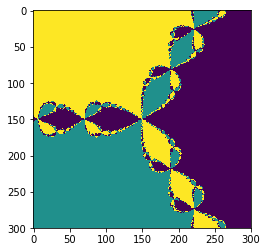

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(NRmethod_array_plot())
# plt.savefig("figure_file_name.png", dpi=300)